# imports

In [1]:
#data processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
#visuals
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading & Exploring Data

In [79]:
dataset=pd.read_csv("../input/spaceship-titanic/train.csv")

In [80]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [81]:
dataset=dataset.drop(['Name'],axis=1)

In [82]:
#data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 823.6+ KB


In [83]:
#missing Data
dataset.isna().any().sum()

11

In [84]:
#Identify Nan entries
np.where(dataset.VIP.isna())

(array([  38,  102,  145,  228,  566,  582,  596,  646,  649,  678,  780,
         832,  835,  840,  850,  924,  942,  954,  959, 1001, 1017, 1028,
        1052, 1070, 1084, 1107, 1116, 1119, 1134, 1139, 1192, 1201, 1383,
        1431, 1464, 1481, 1599, 1627, 1681, 1687, 1690, 1705, 1752, 1760,
        1827, 1840, 1865, 1876, 1908, 1958, 2003, 2007, 2026, 2258, 2273,
        2291, 2301, 2341, 2342, 2346, 2449, 2477, 2511, 2525, 2528, 2547,
        2560, 2562, 2591, 2603, 2639, 2738, 2818, 2877, 2921, 3021, 3031,
        3092, 3175, 3215, 3273, 3287, 3428, 3733, 3744, 3756, 3869, 3874,
        3882, 4075, 4173, 4253, 4387, 4460, 4473, 4538, 4546, 4560, 4641,
        4643, 4753, 4824, 4981, 5041, 5053, 5055, 5086, 5120, 5187, 5191,
        5208, 5231, 5244, 5347, 5409, 5479, 5513, 5535, 5593, 5639, 5645,
        5651, 5697, 5713, 5744, 5759, 5771, 5778, 5779, 5818, 5827, 5854,
        5866, 5949, 6006, 6067, 6160, 6196, 6325, 6373, 6408, 6455, 6488,
        6505, 6506, 6528, 6590, 6601, 

In [85]:
dataset.iloc[38,:]

PassengerId         0036_01
HomePlanet            Earth
CryoSleep             False
Cabin                 F/8/S
Destination     55 Cancri e
Age                    15.0
VIP                     NaN
RoomService             0.0
FoodCourt             492.0
ShoppingMall           48.0
Spa                    20.0
VRDeck                401.0
Transported           False
Name: 38, dtype: object

In [86]:
quantitatave_colums=['RoomService','Age','FoodCourt','ShoppingMall','Spa','VRDeck']
qualitatave_columns=['HomePlanet','CryoSleep','Cabin','Destination','VIP','deck','room','side']

In [87]:
# impurting missing qunatitive data 
for i in quantitatave_colums:
    impute=SimpleImputer(missing_values=np.nan)
    dataset[i]=impute.fit_transform(dataset[i].values.reshape(len(dataset[i]),1))

In [88]:
total_spending=dataset.RoomService+dataset.FoodCourt+dataset.ShoppingMall+dataset.VRDeck
dataset['total_spending']=total_spending
Target=dataset['Transported']
dataset=pd.concat((dataset,pd.DataFrame(cat,columns=['deck','room','side'])),axis=1)
for i in qualitatave_columns:
    impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    dataset[i]=impute.fit_transform(dataset[i].values.reshape(len(dataset[i]),1))
cat=[item.split('/') for item in dataset.Cabin]

# Data expolration & visaulasition

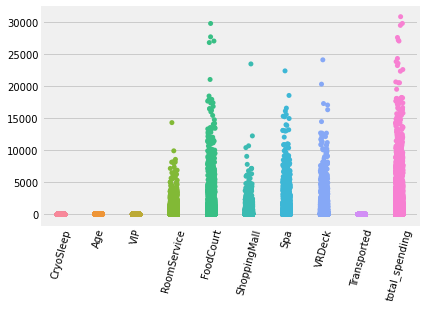

In [89]:
sns.stripplot(data=dataset)
plt.xticks(rotation=75);

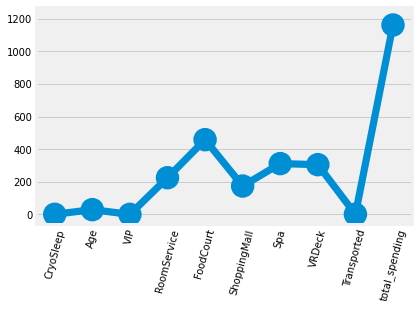

In [90]:
sns.pointplot(data=dataset)
plt.xticks(rotation=75);

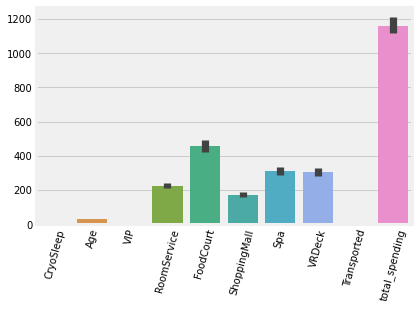

In [91]:
sns.barplot(data=dataset)
plt.xticks(rotation=75);

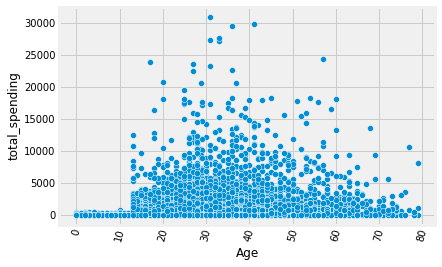

In [92]:
sns.scatterplot(x="Age",y='total_spending',data=dataset)
plt.xticks(rotation=75);

In [93]:
dataset=dataset.drop('Cabin',axis=1)

In [94]:
# peaple with above the mean spending
dataset[dataset.total_spending>dataset.total_spending.mean()].head(6)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spending,deck,room,side
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.000000,6715.0,49.0,False,3668.000000,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.000000,3329.0,193.0,False,1847.000000,A,0,S
6,0006_01,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.000000,0.0,0.0,True,1584.000000,F,2,S
11,0008_03,Europa,False,55 Cancri e,45.0,False,39.0,7295.0,589.000000,110.0,124.0,True,8047.000000,B,1,P
12,0009_01,Mars,False,TRAPPIST-1e,32.0,False,73.0,0.0,1123.000000,0.0,113.0,True,1309.000000,F,1,P
16,0014_01,Mars,False,55 Cancri e,27.0,False,1286.0,122.0,173.729169,0.0,0.0,False,1581.729169,F,3,P


In [95]:
freq=dataset.HomePlanet.value_counts()

In [96]:
#number of passangers effected by the anomily from each planet
df_missing_based_on_planet=dataset[dataset.Transported==True]

In [97]:
df_missing_based_on_planet=df_missing_based_on_planet.groupby("HomePlanet")['Transported'].sum()

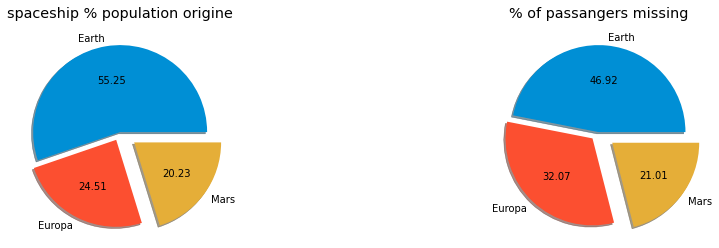

In [98]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
#spaceship popultion origine
plt.pie(freq,labels=[*freq.index],explode=[0.,0.1,0.2],shadow=True,autopct='%.2f')
plt.title('spaceship % population origine')
plt.subplot(1,2,2)
plt.pie(df_missing_based_on_planet,
        labels=[*df_missing_based_on_planet.index],
        explode=[0.,0.1,0.2],
        shadow=True,
        autopct='%.2f')
plt.title('% of passangers missing');

In [99]:
df_deck=dataset.groupby('deck')['Transported'].sum()

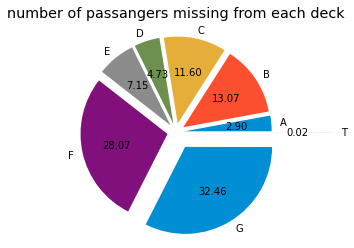

In [100]:
#what deck did most people that where effected belong to
plt.pie(df_deck,
        labels=[*df_deck.index],
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.8],
        autopct='%.2f')
plt.title('number of passangers missing from each deck');

In [101]:
#planet origin of each deck popultion
df_planet_of_deck=dataset.groupby(['HomePlanet','deck'])['Transported'].sum()

In [102]:
df_planet_of_deck=pd.DataFrame(df_planet_of_deck)

In [103]:
stat=[]
for i in df_planet_of_deck.index:
    earth,deck=i
    stat.append([earth,deck])

In [104]:
df_planet_of_deck=pd.DataFrame(df_planet_of_deck,columns=['Transported'])

In [105]:
df_planet_of_deck=pd.concat((
                            pd.DataFrame(df_planet_of_deck.iloc[:,0].values,
                                            columns=['Transported']
                                          )
                           ,pd.DataFrame(stat,columns=['planet','deck'])),
                            axis=1)

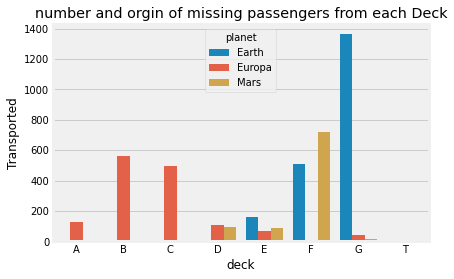

In [106]:
sns.barplot(data=df_planet_of_deck,x='deck',y='Transported',hue='planet')
plt.title('number and orgin of missing passengers from each Deck');

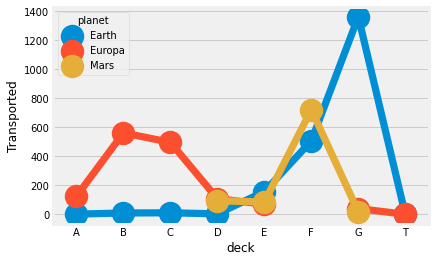

In [107]:
sns.pointplot(data=df_planet_of_deck,x='deck',y='Transported',hue='planet');

In [110]:
dataset

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spending,deck,room,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,187.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3668.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1847.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,526.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,6893.0,A,98,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,G,1499,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1872.0,G,1500,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,4284.0,E,608,S


# Let's make some predictions

In [111]:
#lable encode data
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spending,deck,room,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,187.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3668.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1847.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,526.0,F,1,S


In [112]:
label_encod_columns=['VIP','CryoSleep','Transported']

In [113]:
lb=LabelEncoder()

In [114]:
for i in label_encod_columns:
    dataset[i]=lb.fit_transform(dataset[i])
lb_side=LabelEncoder()
dataset.side=lb_side.fit_transform(dataset.side)

In [119]:
data_copy=dataset.copy()
data_copy.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spending,deck,room,side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,B,0,0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,187.0,F,0,1
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3668.0,A,0,1


In [125]:
x=data_copy.drop(['Transported','PassengerId'],axis=1).values

In [126]:
data_copy

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spending,deck,room,side
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,B,0,0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,187.0,F,0,1
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3668.0,A,0,1
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1847.0,A,0,1
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,526.0,F,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,6893.0,A,98,0
8689,9278_01,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,G,1499,1
8690,9279_01,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1872.0,G,1500,1
8691,9280_01,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4284.0,E,608,1


In [151]:
#let encode the rest of the catigorical variables
#catigorical_var=['HomePlanet','Destination','cab']
enco_Homeplanet=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=enco_Homeplanet.fit_transform(x)

In [159]:
enco_Destination=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[10])],remainder='passthrough')
x=enco_Destination.fit_transform(x)

In [160]:
for i,idx in enumerate(x[0,:]):
    print(f'colum {idx}, its index {i}')

colum 0.0, its index 0
colum 0.0, its index 1
colum 1.0, its index 2
colum 1.0, its index 3
colum 0.0, its index 4
colum 0.0, its index 5
colum 1.0, its index 6
colum 0.0, its index 7
colum 0.0, its index 8
colum 0.0, its index 9
colum 1.0, its index 10
colum 0.0, its index 11
colum 1.0, its index 12
colum 39.0, its index 13
colum 0, its index 14
colum 0.0, its index 15
colum 0.0, its index 16
colum 0.0, its index 17
colum 0.0, its index 18
colum 0.0, its index 19
colum 0.0, its index 20
colum B, its index 21
colum 0, its index 22
colum 0, its index 23


In [161]:
enco_cab=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[21])],remainder='passthrough')
x=enco_cab.fit_transform(x)

In [162]:
x[:,1].shape

(8693,)

In [163]:
y=Target
for i in x:
    print(i)
    break
y=lb.transform(y)
print(y)

[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0
 1.0 0.0 1.0 39.0 0 0.0 0.0 0.0 0.0 0.0 0.0 '0' 0]
[0 1 0 ... 1 0 1]


# build models n evaluate them

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [165]:
dics_tree=DecisionTreeClassifier(criterion='entropy')
dics_tree.fit(x_train,y_train)
cm_dic=confusion_matrix(y_test,dics_tree.predict(x_test))
print(cm_dic)
cross_accuracy_dic=cross_val_score(estimator=dics_tree,X=x_train,y=y_train,cv=10)
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(dics_tree.score(x_test,y_test)*100
                                                                 ,cross_accuracy_dic.mean()*100))

[[661 202]
 [212 664]]
accuracy: 76.19% cross_validation score: 75.38%


In [166]:
rand_forst=RandomForestClassifier(n_estimators=100)
rand_forst.fit(x_train,y_train)
cm_rand=confusion_matrix(y_test,rand_forst.predict(x_test))
print(cm_rand)
cross_accuracy_rand=cross_val_score(estimator=rand_forst,X=x_train,y=y_train,cv=10)
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(rand_forst.score(x_test,y_test)*100
                                                                 ,cross_accuracy_rand.mean()*100))

[[726 137]
 [207 669]]
accuracy: 80.22% cross_validation score: 79.15%


In [167]:
logistic=LogisticRegressionCV()
logistic.fit(x_train,y_train)
cm_logistic=confusion_matrix(y_test,logistic.predict(x_test))
print(cm_logistic)
cross_accuracy_logistic=cross_val_score(estimator=logistic,X=x_train,y=y_train,cv=10)
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(logistic.score(x_test,y_test)*100
                                                                 ,cross_accuracy_logistic.mean()*100));

[[641 222]
 [140 736]]
accuracy: 79.18% cross_validation score: 79.98%


In [175]:
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
cm_xgb=confusion_matrix(y_test,svm.predict(x_test))
print(cm_xgb)
cross_accuracy_svm=cross_val_score(estimator=svm,X=x_train,y=y_train,cv=10)
svm_ac=cross_accuracy_svm.mean()*100
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(svm.score(x_test,y_test)*100
                                                                 ,svm_ac));

[[579 284]
 [104 772]]
accuracy: 77.69% cross_validation score: 78.65%


In [176]:
from xgboost import XGBRFClassifier
xgboost=XGBRFClassifier(gamma=0.3)
xgboost.fit(x_train,y_train)
cm_xgb=confusion_matrix(y_test,xgboost.predict(x_test))
print(cm_xgb)
cross_accuracy_xgboost=cross_val_score(estimator=xgboost,X=x_train,y=y_train,cv=10,n_jobs=-1)
xgb_ac=cross_accuracy_xgboost.mean()*100

[[666 197]
 [154 722]]


In [177]:
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(xgboost.score(x_test,y_test)*100
                                                                 ,xgb_ac));

accuracy: 79.82% cross_validation score: 79.03%


In [178]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
cm_knn=confusion_matrix(y_test,knn.predict(x_test))
print(cm_knn)
cross_accuracy_knn=cross_val_score(estimator=knn,X=x_train,y=y_train,cv=10,n_jobs=-1)
knn_ac=cross_accuracy_knn.mean()*100
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(knn.score(x_test,y_test)*100
                                                                 ,knn_ac));

[[622 241]
 [151 725]]
accuracy: 77.46% cross_validation score: 76.70%


In [179]:
from sklearn.ensemble import ExtraTreesClassifier

In [180]:
Extratree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=25, random_state=0)
Extratree.fit(x_train,y_train)
cm_Extratree=confusion_matrix(y_test,Extratree.predict(x_test))
print(cm_Extratree)
cross_accuracy_Extratree=cross_val_score(estimator=Extratree,X=x_train,y=y_train,cv=10,n_jobs=-1)
Extratree_ac=cross_accuracy_Extratree.mean()*100
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(Extratree.score(x_test,y_test)*100
                                                                 ,Extratree_ac));

[[728 135]
 [209 667]]
accuracy: 80.22% cross_validation score: 80.21%


In [201]:
from sklearn.decomposition import PCA
ld_train=PCA()
feature_x_train=ld_train.fit_transform(x_train,y_train)
feature_x_test=ld_train.transform(x_test)

In [202]:
feature_x_train.shape

(6954, 31)

In [203]:
Extratree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=25, random_state=0)
Extratree.fit(feature_x_train,y_train)
cm_Extratree=confusion_matrix(y_test,Extratree.predict(feature_x_test))
print(cm_Extratree)
cross_accuracy_Extratree=cross_val_score(estimator=Extratree,X=feature_x_train,y=y_train,cv=10,n_jobs=-1)
Extratree_ac=cross_accuracy_Extratree.mean()*100
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(Extratree.score(feature_x_test,y_test)*100
                                                                 ,Extratree_ac))

[[737 126]
 [208 668]]
accuracy: 80.79% cross_validation score: 79.65%


In [209]:
from xgboost import XGBClassifier
xgboost=XGBClassifier()
xgboost.fit(feature_x_train,y_train)
cm_xgb=confusion_matrix(y_test,xgboost.predict(feature_x_test))
print(cm_xgb)
cross_accuracy_xgboost=cross_val_score(estimator=xgboost,X=feature_x_train,y=y_train,cv=10,n_jobs=-1)
xgb_ac=cross_accuracy_xgboost.mean()*100


[[640 223]
 [151 725]]


In [210]:
print('accuracy: {:.2f}% cross_validation score: {:.2f}%'.format(xgboost.score(feature_x_test,y_test)*100
                                                                 ,xgb_ac));

accuracy: 78.49% cross_validation score: 80.23%
